In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# import os
# from zipfile import ZipFile
import time
from datetime import datetime
import itertools

import pickle

In [2]:
combined_classes = pd.read_csv("./Dataset/combined_faces_classes_summary.csv")
combined_classes

,Class label,Age-ranges (classes),No. of images,Class balance (%)
0,0,1 - 2,3192,9.53
1,1,3 - 9,2816,8.41
2,2,10 - 20,3136,9.37
3,3,21 - 25,3474,10.37
4,4,26 - 27,3217,9.61
5,5,28 - 31,3063,9.15
6,6,32 - 36,3086,9.22
7,7,37 - 45,3207,9.58
8,8,46 - 54,2802,8.37
9,9,55 - 65,2796,8.35


In [3]:
# Defining a function to return the class labels corresponding to the age-ranges shown above.

def class_labels(age):
    if 1 <= age <= 2:
        return 1
    elif 3 <= age <= 9:
        return 2
    elif 10 <= age <= 20:
        return 3
    elif 21 <= age <= 25:
        return 4
    elif 26 <= age <= 27:
        return 5
    elif 28 <= age <= 31:
        return 6
    elif 32 <= age <= 36:
        return 7
    elif 37 <= age <= 45:
        return 8
    elif 46 <= age <= 54:
        return 9
    elif 55 <= age <= 65:
        return 10
    else:
        return 11

In [4]:
# Importing the feature names.

feature_names = pd.read_csv("./Dataset/canny_features_names.csv")
feature_names

,canny_edge_features
0,sec1_mean
1,sec1_std
2,sec2_mean
3,sec2_std
4,sec3_mean
...,...
796,sec399_mean
797,sec399_std
798,sec400_mean
799,sec400_std


In [5]:
# Importing the numpy arrays of train and test datasets.

train = np.load("./Dataset/canny_features_age_train.npy")
test = np.load("./Dataset/canny_features_age_test.npy")

In [6]:
# Converting the numpy arrays to pandas dataframe.

train_df = pd.DataFrame(train, columns=feature_names["canny_edge_features"])
test_df = pd.DataFrame(test, columns=feature_names["canny_edge_features"])

In [7]:
train_df.head()

canny_edge_features,sec1_mean,sec1_std,sec2_mean,sec2_std,sec3_mean,sec3_std,sec4_mean,sec4_std,sec5_mean,sec5_std,...,sec396_std,sec397_mean,sec397_std,sec398_mean,sec398_std,sec399_mean,sec399_std,sec400_mean,sec400_std,age
0,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,...,0.357071,0.21,0.407308,0.27,0.443959,0.22,0.414246,0.24,0.427083,20.0
1,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.12,0.324962,0.00,0.000000,...,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,9.0
2,0.02,0.140000,0.15,0.357071,0.19,0.392301,0.17,0.375633,0.16,0.366606,...,0.324962,0.12,0.324962,0.22,0.414246,0.20,0.400000,0.16,0.366606,8.0
3,0.22,0.414246,0.06,0.237487,0.25,0.433013,0.17,0.375633,0.00,0.000000,...,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.09,0.286182,40.0
4,0.09,0.286182,0.12,0.324962,0.00,0.000000,0.00,0.000000,0.00,0.000000,...,0.336303,0.12,0.324962,0.00,0.000000,0.00,0.000000,0.00,0.000000,21.0


In [8]:
test_df.head()

canny_edge_features,sec1_mean,sec1_std,sec2_mean,sec2_std,sec3_mean,sec3_std,sec4_mean,sec4_std,sec5_mean,sec5_std,...,sec396_std,sec397_mean,sec397_std,sec398_mean,sec398_std,sec399_mean,sec399_std,sec400_mean,sec400_std,age
0,0.16,0.366606,0.24,0.427083,0.04,0.195959,0.00,0.000000,0.00,0.000000,...,0.300000,0.04,0.195959,0.10,0.300000,0.07,0.255147,0.00,0.000000,9.0
1,0.16,0.366606,0.18,0.384187,0.17,0.375633,0.24,0.427083,0.27,0.443959,...,0.324962,0.13,0.336303,0.00,0.000000,0.00,0.000000,0.00,0.000000,42.0
2,0.09,0.286182,0.11,0.312890,0.00,0.000000,0.00,0.000000,0.00,0.000000,...,0.000000,0.15,0.357071,0.13,0.336303,0.00,0.000000,0.00,0.000000,40.0
3,0.00,0.000000,0.08,0.271293,0.21,0.407308,0.09,0.286182,0.00,0.000000,...,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,34.0
4,0.09,0.286182,0.19,0.392301,0.15,0.357071,0.00,0.000000,0.00,0.000000,...,0.000000,0.00,0.000000,0.10,0.300000,0.11,0.312890,0.22,0.414246,6.0


In [9]:
train_df.shape

(23440, 801)

In [10]:
test_df.shape

(10046, 801)

In [11]:
train_df.dtypes.unique()

array([dtype('float64')], dtype=object)

In [12]:
test_df.dtypes.unique()

array([dtype('float64')], dtype=object)

In [13]:
train_df['age'] = train_df['age'].astype(np.uint8)
test_df['age'] = test_df['age'].astype(np.uint8)

In [14]:
# Creating a column of target class values using the function defined above.

train_df['target'] = train_df['age'].map(class_labels)
test_df['target'] = test_df['age'].map(class_labels)

In [15]:
train_df.head()

canny_edge_features,sec1_mean,sec1_std,sec2_mean,sec2_std,sec3_mean,sec3_std,sec4_mean,sec4_std,sec5_mean,sec5_std,...,sec397_mean,sec397_std,sec398_mean,sec398_std,sec399_mean,sec399_std,sec400_mean,sec400_std,age,target
0,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,...,0.21,0.407308,0.27,0.443959,0.22,0.414246,0.24,0.427083,20,3
1,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.12,0.324962,0.00,0.000000,...,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,9,2
2,0.02,0.140000,0.15,0.357071,0.19,0.392301,0.17,0.375633,0.16,0.366606,...,0.12,0.324962,0.22,0.414246,0.20,0.400000,0.16,0.366606,8,2
3,0.22,0.414246,0.06,0.237487,0.25,0.433013,0.17,0.375633,0.00,0.000000,...,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.09,0.286182,40,8
4,0.09,0.286182,0.12,0.324962,0.00,0.000000,0.00,0.000000,0.00,0.000000,...,0.12,0.324962,0.00,0.000000,0.00,0.000000,0.00,0.000000,21,4


In [16]:
test_df.head()

canny_edge_features,sec1_mean,sec1_std,sec2_mean,sec2_std,sec3_mean,sec3_std,sec4_mean,sec4_std,sec5_mean,sec5_std,...,sec397_mean,sec397_std,sec398_mean,sec398_std,sec399_mean,sec399_std,sec400_mean,sec400_std,age,target
0,0.16,0.366606,0.24,0.427083,0.04,0.195959,0.00,0.000000,0.00,0.000000,...,0.04,0.195959,0.10,0.300000,0.07,0.255147,0.00,0.000000,9,2
1,0.16,0.366606,0.18,0.384187,0.17,0.375633,0.24,0.427083,0.27,0.443959,...,0.13,0.336303,0.00,0.000000,0.00,0.000000,0.00,0.000000,42,8
2,0.09,0.286182,0.11,0.312890,0.00,0.000000,0.00,0.000000,0.00,0.000000,...,0.15,0.357071,0.13,0.336303,0.00,0.000000,0.00,0.000000,40,8
3,0.00,0.000000,0.08,0.271293,0.21,0.407308,0.09,0.286182,0.00,0.000000,...,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,34,7
4,0.09,0.286182,0.19,0.392301,0.15,0.357071,0.00,0.000000,0.00,0.000000,...,0.00,0.000000,0.10,0.300000,0.11,0.312890,0.22,0.414246,6,2


In [17]:
# Splitting the above train and test dataframes into features (X) and target (y).

X_train = train_df.drop(columns=['age', 'target'])
y_train = train_df['target']

X_test = test_df.drop(columns=['age', 'target'])
y_test = test_df['target']

In [18]:
X_train.head()

canny_edge_features,sec1_mean,sec1_std,sec2_mean,sec2_std,sec3_mean,sec3_std,sec4_mean,sec4_std,sec5_mean,sec5_std,...,sec396_mean,sec396_std,sec397_mean,sec397_std,sec398_mean,sec398_std,sec399_mean,sec399_std,sec400_mean,sec400_std
0,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,...,0.15,0.357071,0.21,0.407308,0.27,0.443959,0.22,0.414246,0.24,0.427083
1,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.12,0.324962,0.00,0.000000,...,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000
2,0.02,0.140000,0.15,0.357071,0.19,0.392301,0.17,0.375633,0.16,0.366606,...,0.12,0.324962,0.12,0.324962,0.22,0.414246,0.20,0.400000,0.16,0.366606
3,0.22,0.414246,0.06,0.237487,0.25,0.433013,0.17,0.375633,0.00,0.000000,...,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.09,0.286182
4,0.09,0.286182,0.12,0.324962,0.00,0.000000,0.00,0.000000,0.00,0.000000,...,0.13,0.336303,0.12,0.324962,0.00,0.000000,0.00,0.000000,0.00,0.000000


In [19]:
X_train.shape

(23440, 800)

In [20]:
X_test.head()

canny_edge_features,sec1_mean,sec1_std,sec2_mean,sec2_std,sec3_mean,sec3_std,sec4_mean,sec4_std,sec5_mean,sec5_std,...,sec396_mean,sec396_std,sec397_mean,sec397_std,sec398_mean,sec398_std,sec399_mean,sec399_std,sec400_mean,sec400_std
0,0.16,0.366606,0.24,0.427083,0.04,0.195959,0.00,0.000000,0.00,0.000000,...,0.10,0.300000,0.04,0.195959,0.10,0.300000,0.07,0.255147,0.00,0.000000
1,0.16,0.366606,0.18,0.384187,0.17,0.375633,0.24,0.427083,0.27,0.443959,...,0.12,0.324962,0.13,0.336303,0.00,0.000000,0.00,0.000000,0.00,0.000000
2,0.09,0.286182,0.11,0.312890,0.00,0.000000,0.00,0.000000,0.00,0.000000,...,0.00,0.000000,0.15,0.357071,0.13,0.336303,0.00,0.000000,0.00,0.000000
3,0.00,0.000000,0.08,0.271293,0.21,0.407308,0.09,0.286182,0.00,0.000000,...,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000
4,0.09,0.286182,0.19,0.392301,0.15,0.357071,0.00,0.000000,0.00,0.000000,...,0.00,0.000000,0.00,0.000000,0.10,0.300000,0.11,0.312890,0.22,0.414246


In [21]:
X_test.shape

(10046, 800)

In [22]:
# Checking the distribution of classes in y_train.

y_train.value_counts()

4     2432
5     2252
8     2245
1     2234
3     2195
7     2160
6     2144
2     1971
9     1962
10    1957
11    1888
Name: target, dtype: int64

In [23]:
# Checking the distribution of classes to ensure it is same as y_test.

y_train.value_counts(normalize=True)

4     0.103754
5     0.096075
8     0.095776
1     0.095307
3     0.093643
7     0.092150
6     0.091468
2     0.084087
9     0.083703
10    0.083490
11    0.080546
Name: target, dtype: float64

In [24]:
# Checking the distribution of classes to ensure it is same as y_train.

y_test.value_counts(normalize=True)

4     0.103723
5     0.096058
8     0.095760
1     0.095361
3     0.093669
7     0.092176
6     0.091479
2     0.084113
9     0.083615
10    0.083516
11    0.080530
Name: target, dtype: float64

In [25]:
# Scaling X_train to the standard scale.

ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)

In [26]:
# Transforming X_test to the same scale.

X_test_sc = ss.transform(X_test)

In [27]:
# Creating a RandomForestClassifier object.

rfc = RandomForestClassifier(# class_weight='balanced_subsample', 
                             # n_estimators=200,
                             # max_depth=5,
                             ccp_alpha=0,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             random_state=42
                            )

In [28]:
# Establishing ranges of hyperparameters of RandomForestClassifier for GridSearchCV.

rfc_params = {'n_estimators' : [50, 100, 200],
              'max_depth' : [5, 7, 9],
              # 'ccp_alpha' : [0, 0.001, 0.01, 0.1, 1, 10],
              # 'min_samples_split' : [2, 5, 10, 15, 20],
              # 'min_samples_leaf' : [2, 3, 4, 5, 6]
             }

In [29]:
# Creating a GridSearchCV object for the RandomForestClassifier object defined above.

rfc_gs = GridSearchCV(rfc, param_grid=rfc_params, n_jobs=-1, cv=5)

In [30]:
# Fitting X_train_sc and y_train on GridSearchCV object with RandomForestClassifier defined above.

rfc_gs.fit(X_train_sc, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(ccp_alpha=0, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9],
                         'n_estimators': [50, 100, 200]})

In [31]:
# Best combination of hyperparameters suggested by GridSearchCV.

rfc_gs.best_params_

{'max_depth': 9, 'n_estimators': 200}

In [32]:
# Best accuracy score obtained by the above combination of hyperparameters.

rfc_gs.best_score_

0.39266211604095563

In [33]:
# Scoring the model on training dataset.
# Training Accuracy

rfc_train_acc = rfc_gs.score(X_train_sc, y_train)
rfc_train_acc

0.6679180887372014

In [34]:
# Estimated Testing Accuracy

# rfc_est_test_acc = cross_val_score(rfc_gs, X_train_sc, y_train, cv=5).mean()
# rfc_est_test_acc

In [35]:
# Actual Testing Accuracy

rfc_test_acc = rfc_gs.score(X_test_sc, y_test)
rfc_test_acc

0.39806888313756716

In [36]:
# Summary scores from GridSearchCV with RandomForestClassifier.

print("RandomForestClassifier summary of accuracy scores:")
print(f"GridSearchCV best accuracy (cv=5) = {round(rfc_gs.best_score_, 3)}")
print("\nUsing GridSearchCV best params suggested,")
print(f"Training accuracy = {round(rfc_train_acc, 3)}")
# print(f"Est. Test accuracy (cv=5) = {round(rfc_est_test_acc , 3)}")
print(f"Testing accuracy = {round(rfc_test_acc, 3)}")

RandomForestClassifier summary of accuracy scores:
GridSearchCV best accuracy (cv=5) = 0.393

Using GridSearchCV best params suggested,
Training accuracy = 0.668
Testing accuracy = 0.398


In [37]:
# Generating predictions on testing dataset using the model above.

rfc_pred = rfc_gs.predict(X_test_sc)

In [38]:
len(rfc_pred)

10046

In [39]:
len(y_test)

10046

In [44]:
# Generating a confusion matrix based on above predictions.

conf_mat_rfc = confusion_matrix(y_test, rfc_pred)
conf_mat_rfc

array([[858,  19,   5,  35,  11,   0,   4,  11,   6,   1,   8],
       [218, 369,  76,  93,  17,   1,   2,  36,  19,   6,   8],
       [ 70,  39, 398, 254,  39,   0,  21,  58,  29,  12,  21],
       [ 42,  30,  49, 647,  70,  16,  29,  84,  36,  20,  19],
       [ 77,  13,  30, 395, 197,   8,  50, 136,  27,  18,  14],
       [ 30,  23,  39, 371, 122,  42,  36, 159,  47,  19,  31],
       [ 41,  19,  48, 280,  98,  11,  91, 186,  68,  48,  36],
       [ 34,  12,  33, 188,  96,   9,  31, 359,  98,  59,  43],
       [ 25,  14,  47,  99,  49,   5,  23, 159, 262,  67,  90],
       [ 32,  13,  35,  91,  50,   3,  11, 137,  88, 263, 116],
       [ 22,   6,  36,  29,  19,   3,   5,  97,  37,  42, 513]],
      dtype=int64)

In [45]:
# Defining a function to plot the confusion matrix in a grid for easier visualization.

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', export_as='confusion_matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=16)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True labels', fontsize=14)
    plt.xlabel('Predicted labels', fontsize=14)

    # Exporting plot image in PNG format.
    plt.savefig('./Plot Images/{export_as}.png', bbox_inches='tight');

Normalized confusion matrix


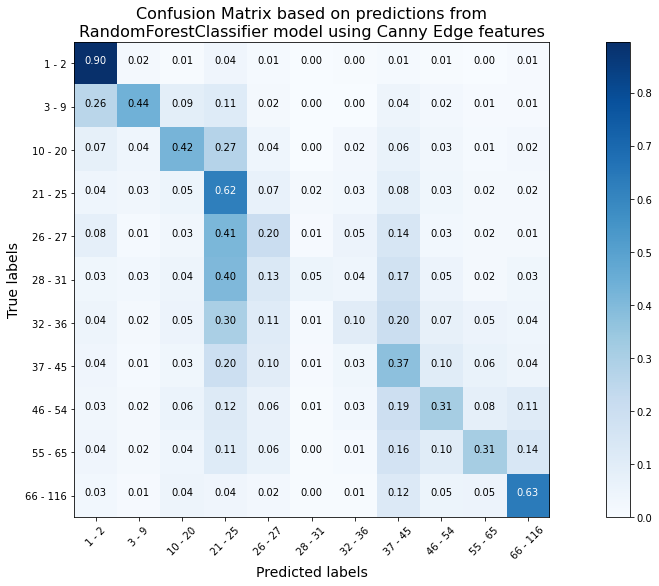

In [46]:
# Plotting the NORMALIZED confusion matrix using the function defined above.

cm_plot_labels = combined_classes['Age-ranges (classes)']

plt.figure(figsize=(16,8))
plot_confusion_matrix(conf_mat_rfc, cm_plot_labels, normalize=True,
                      title="Confusion Matrix based on predictions from\nRandomForestClassifier model using Canny Edge features",
                      export_as="rfc_canny_conf_mat_norm"
                     )

plt.show()

Confusion matrix, without normalization


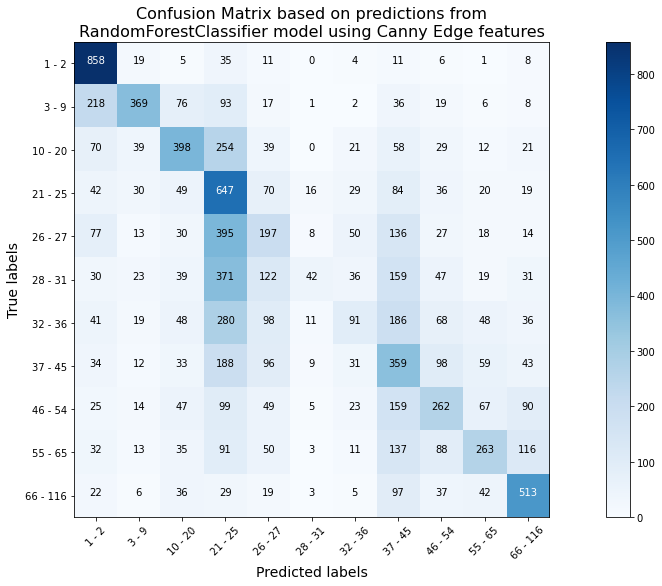

In [47]:
# Plotting the confusion matrix using the function defined above.

cm_plot_labels = combined_classes['Age-ranges (classes)']

plt.figure(figsize=(16,8))
plot_confusion_matrix(conf_mat_rfc, cm_plot_labels, normalize=False,
                      title="Confusion Matrix based on predictions from\nRandomForestClassifier model using Canny Edge features",
                      export_as="rfc_canny_conf_mat"
                     )

plt.show()

In [48]:
# Saving the RandomForestClassifier model from above in a pickle file for possible use later.

rfc_pickle = "./Dataset/rfc_canny_model_acc_{round(rfc_test_acc, 3)}"
pickle.dump(rfc_gs, open(rfc_pickle, 'wb'))

In [49]:
# Creating a SVC object.

svc = SVC(# class_weight='balanced',
          # C=1.0,
          # kernel='rbf',
          # degree=3,
          random_state=42
         )

In [50]:
# Establishing ranges of hyperparameters of SVC for GridSearchCV.

svc_params = {'C' : [0.001, 1],
              'kernel' : ['rbf', 'poly', 'linear'],
              'degree' : [3, 5]
             }

In [51]:
# Creating a GridSearchCV object for the SVC object defined above.

svc_gs = GridSearchCV(svc, param_grid=svc_params, n_jobs=-1, cv=5)

In [ ]:
# Fitting X_train_sc and y_train on GridSearchCV object with SVC defined above.

svc_gs.fit(X_train_sc, y_train)

In [ ]:
# Best combination of hyperparameters suggested by GridSearchCV.

svc_gs.best_params_

In [ ]:
# Best accuracy score obtained by the above combination of hyperparameters.

svc_gs.best_score_

In [ ]:
# Scoring the model on training dataset.
# Training Accuracy

svc_train_acc = svc_gs.score(X_train_sc, y_train)
svc_train_acc

In [ ]:
# Estimated Testing Accuracy

# svc_est_test_acc = cross_val_score(svc_gs, X_train_sc, y_train, cv=5).mean()
# svc_est_test_acc

In [ ]:
# Actual Testing Accuracy

svc_test_acc = svc_gs.score(X_test_sc, y_test)
svc_test_acc

0.5337447740394187

In [ ]:
# Summary scores from GridSearchCV with SVC.

print("SVC summary of accuracy scores:")
print(f"GridSearchCV best accuracy = {round(svc_gs.best_score_, 3)}")
print("\nUsing GridSearchCV best params suggested,")
print(f"Training accuracy = {round(svc_train_acc, 3)}")
# print(f"Est. Test accuracy (cv=5) = {round(svc_est_test_acc , 3)}")
print(f"Testing accuracy = {round(svc_test_acc, 3)}")

SVC summary of accuracy scores:
GridSearchCV best accuracy = 0.49

Using GridSearchCV best params suggested,
Training accuracy = 0.929
Testing accuracy = 0.534


In [ ]:
# Generating predictions on testing dataset using the model above.

svc_pred = svc_gs.predict(X_test_sc)

In [ ]:
len(svc_pred)

10046

In [ ]:
len(y_test)

10046

In [ ]:
# Generating a confusion matrix based on above predictions.

conf_mat_svc = confusion_matrix(y_test, svc_pred)
conf_mat_svc

array([[881,  19,   1,  10,  12,   3,  19,  12,   0,   0,   1],
       [ 61, 588,  34,  70,  20,   9,  36,  24,   2,   1,   0],
       [  8,  36, 533, 219,  43,  18,  36,  32,   7,   4,   5],
       [  2,   4,  34, 709, 110,  59,  64,  51,   3,   2,   4],
       [  4,   9,  12, 293, 400,  61,  98,  63,   6,  10,   9],
       [  0,   6,  13, 267, 140, 258, 114,  91,  16,   6,   8],
       [  1,   5,   9, 177, 133,  64, 334, 159,  30,   8,   6],
       [  2,   3,  10,  98, 105,  48, 146, 485,  38,  15,  12],
       [  2,   9,  13,  51,  54,  21,  92, 213, 320,  47,  18],
       [  2,   5,  13,  57,  43,  17,  96, 172,  57, 332,  45],
       [  0,   6,  15,  18,  22,  11,  42,  97,  32,  44, 522]])

Normalized confusion matrix


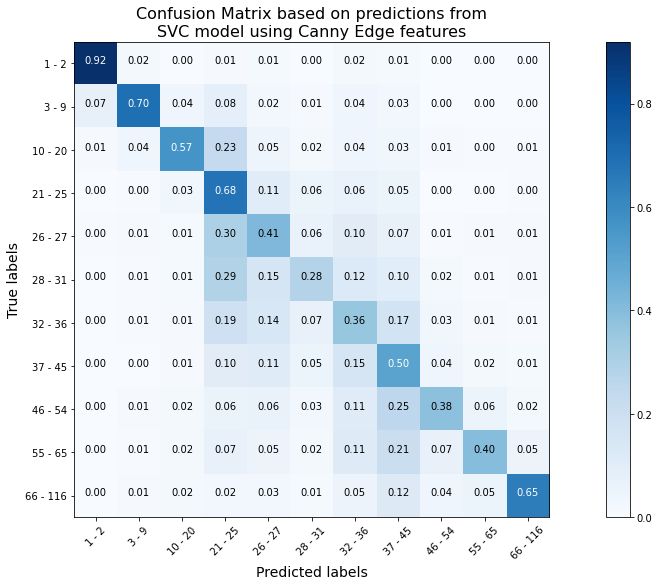

In [ ]:
# Plotting the NORMALIZED confusion matrix using the function defined above.

cm_plot_labels = combined_classes['Age-ranges (classes)']

plt.figure(figsize=(16,8))
plot_confusion_matrix(conf_mat_svc, cm_plot_labels, normalize=True,
                      title="Confusion Matrix based on predictions from\nSVC model using Canny Edge features",
                      export_as="svc_canny_conf_mat_norm"
                     )

plt.show()

Confusion matrix, without normalization


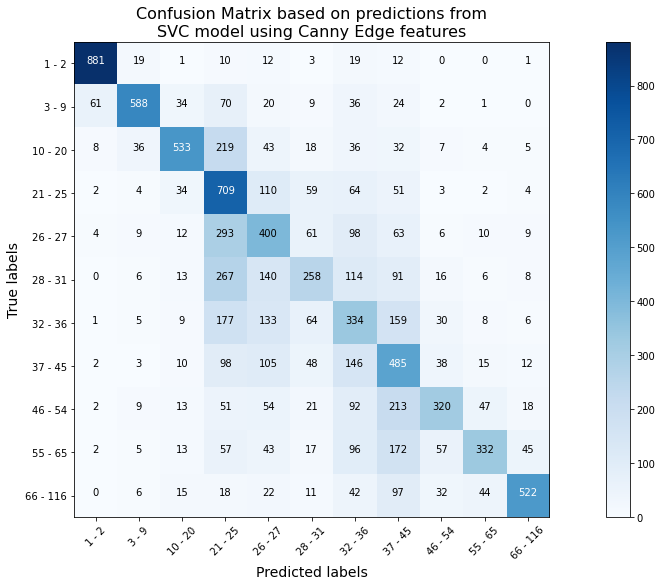

In [ ]:
# Plotting the confusion matrix using the function defined above.

cm_plot_labels = combined_classes['Age-ranges (classes)']

plt.figure(figsize=(16,8))
plot_confusion_matrix(conf_mat_svc, cm_plot_labels, normalize=False,
                      title="Confusion Matrix based on predictions from\nSVC model using Canny Edge features",
                      export_as="svc_canny_conf_mat"
                     )

plt.show()

As with the *RandomForestClassifier* model above, the ***SVC* model**, with a training accuracy of 92.9% and a testing accuracy of 53.4%, also shows that it is **over-fitting and not generalizing well on unseen testing data**. Even though the training and testing accuracies are better with *SVC* than with *RandomForestClassifier*, the **degree of over-fit is significantly worse than *RandomForestClassifier***.

The **normalized confusion matrix** above also show the same trend — even though the accuracy values are somewhat high for the younger age-ranges (of 1–2, 3–9, 10–20 and 21–25) and for the older age ranges (of 66–116), there is a **presence of significant misclassification for the middle age-ranges of 26–65**.

In [ ]:
# Saving the SVC model from above in a pickle file for possible use later.

svc_pickle = f"/content/drive/My Drive/Age_Classification_with_Faces/input_output/svc_canny_model_acc_{round(svc_test_acc, 3)}"
pickle.dump(svc_gs, open(svc_pickle, 'wb'))